In [442]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [443]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [444]:
NUM_CLASSES = 16

# Dataset reading

In [445]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [446]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [448]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [449]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [450]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_40 (Dropout)        (None, 86)                0         
                                                                 
 dense_60 (Dense)            (None, 100)               8700      
                                                                 
 dropout_41 (Dropout)        (None, 100)               0         
                                                                 
 dense_61 (Dense)            (None, 50)                5050      
                                                                 
 dense_62 (Dense)            (None, 16)                816       
                                                                 
Total params: 14566 (56.90 KB)
Trainable params: 14566 (56.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [451]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [452]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [453]:
model.fit(
    X_train,
    y_train,
    epochs=100*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1600
 7/12 [================>.............] - ETA: 0s - loss: 2.7100 - accuracy: 0.1440 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 2s 62ms/step - loss: 2.6472 - accuracy: 0.1599 - val_loss: 2.4058 - val_accuracy: 0.2601
Epoch 2/1600
 8/12 [===================>..........] - ETA: 0s - loss: 2.3853 - accuracy: 0.2148

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 24ms/step - loss: 2.3431 - accuracy: 0.2245 - val_loss: 2.1394 - val_accuracy: 0.2621
Epoch 3/1600
 8/12 [===================>..........] - ETA: 0s - loss: 2.1717 - accuracy: 0.2490
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 24ms/step - loss: 2.1468 - accuracy: 0.2574 - val_loss: 1.9356 - val_accuracy: 0.4375
Epoch 4/1600
 7/12 [================>.............] - ETA: 0s - loss: 1.9814 - accuracy: 0.3281
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 24ms/step - loss: 1.9658 - accuracy: 0.3313 - val_loss: 1.7427 - val_accuracy: 0.4496
Epoch 5/1600
 7/12 [================>.............] - ETA: 0s - loss: 1.9000 - accuracy: 0.3415
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==========

 8/12 [===================>..........] - ETA: 0s - loss: 0.4609 - accuracy: 0.8223
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 22ms/step - loss: 0.4743 - accuracy: 0.8206 - val_loss: 0.2361 - val_accuracy: 0.9194
Epoch 30/1600
 7/12 [================>.............] - ETA: 0s - loss: 0.4719 - accuracy: 0.8304
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.4586 - accuracy: 0.8306 - val_loss: 0.2338 - val_accuracy: 0.9214
Epoch 31/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.4549 - accuracy: 0.8223
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.4622 - accuracy: 0.8165 - val_loss: 0.2263 - val_accuracy: 0.9456
Epoch 32/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.4349 - accuracy: 0.8438
Epoch

Epoch 56/1600
 7/12 [================>.............] - ETA: 0s - loss: 0.3142 - accuracy: 0.8761
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 22ms/step - loss: 0.3115 - accuracy: 0.8770 - val_loss: 0.1427 - val_accuracy: 0.9677
Epoch 57/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.3303 - accuracy: 0.8682
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.3283 - accuracy: 0.8683 - val_loss: 0.1550 - val_accuracy: 0.9375
Epoch 58/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.3106 - accuracy: 0.8760
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 22ms/step - loss: 0.3092 - accuracy: 0.8824 - val_loss: 0.1363 - val_accuracy: 0.9698
Epoch 59/1600
 7/12 [================>.............] - ETA: 0s - loss: 0.3074 - accuracy

Epoch 83/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.2504 - accuracy: 0.9092
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.2464 - accuracy: 0.9073 - val_loss: 0.0928 - val_accuracy: 0.9798
Epoch 84/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.2307 - accuracy: 0.9082
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.2322 - accuracy: 0.9059 - val_loss: 0.0971 - val_accuracy: 0.9778
Epoch 85/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.2358 - accuracy: 0.8984
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.2451 - accuracy: 0.8952 - val_loss: 0.0967 - val_accuracy: 0.9778
Epoch 86/1600
 7/12 [================>.............] - ETA: 0s - loss: 0.2467 - accuracy

Epoch 110/1600
 9/12 [=====================>........] - ETA: 0s - loss: 0.2206 - accuracy: 0.9184
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.2284 - accuracy: 0.9167 - val_loss: 0.0751 - val_accuracy: 0.9839
Epoch 111/1600
 9/12 [=====================>........] - ETA: 0s - loss: 0.2056 - accuracy: 0.9175
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 20ms/step - loss: 0.2160 - accuracy: 0.9153 - val_loss: 0.0734 - val_accuracy: 0.9899
Epoch 112/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.2031 - accuracy: 0.9160
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.2052 - accuracy: 0.9173 - val_loss: 0.0714 - val_accuracy: 0.9879
Epoch 113/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.2387 - a

Epoch 137/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.1872 - accuracy: 0.9268
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.1797 - accuracy: 0.9301 - val_loss: 0.0616 - val_accuracy: 0.9899
Epoch 138/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.1975 - accuracy: 0.9268
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.1918 - accuracy: 0.9288 - val_loss: 0.0689 - val_accuracy: 0.9879
Epoch 139/1600
 9/12 [=====================>........] - ETA: 0s - loss: 0.1909 - accuracy: 0.9245
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 20ms/step - loss: 0.1904 - accuracy: 0.9241 - val_loss: 0.0611 - val_accuracy: 0.9919
Epoch 140/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.2089 - a

Epoch 164/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.1799 - accuracy: 0.9297
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 22ms/step - loss: 0.1732 - accuracy: 0.9288 - val_loss: 0.0643 - val_accuracy: 0.9940
Epoch 165/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.1525 - accuracy: 0.9434
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 22ms/step - loss: 0.1662 - accuracy: 0.9382 - val_loss: 0.0585 - val_accuracy: 0.9940
Epoch 166/1600
 7/12 [================>.............] - ETA: 0s - loss: 0.1933 - accuracy: 0.9185
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 23ms/step - loss: 0.1886 - accuracy: 0.9241 - val_loss: 0.0585 - val_accuracy: 0.9899
Epoch 167/1600
 7/12 [================>.............] - ETA: 0s - loss: 0.1562 - a

Epoch 191/1600
12/12 [==============================] - ETA: 0s - loss: 0.1433 - accuracy: 0.9496
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 25ms/step - loss: 0.1433 - accuracy: 0.9496 - val_loss: 0.0478 - val_accuracy: 0.9940
Epoch 192/1600
 7/12 [================>.............] - ETA: 0s - loss: 0.1365 - accuracy: 0.9565
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 22ms/step - loss: 0.1476 - accuracy: 0.9509 - val_loss: 0.0457 - val_accuracy: 0.9940
Epoch 193/1600
 7/12 [================>.............] - ETA: 0s - loss: 0.1777 - accuracy: 0.9375
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 24ms/step - loss: 0.1588 - accuracy: 0.9422 - val_loss: 0.0457 - val_accuracy: 0.9940
Epoch 194/1600
 7/12 [================>.............] - ETA: 0s - loss: 0.1469 - a

Epoch 218/1600
 7/12 [================>.............] - ETA: 0s - loss: 0.1925 - accuracy: 0.9263
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 24ms/step - loss: 0.1836 - accuracy: 0.9294 - val_loss: 0.0482 - val_accuracy: 0.9940
Epoch 219/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.1584 - accuracy: 0.9385
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 22ms/step - loss: 0.1525 - accuracy: 0.9409 - val_loss: 0.0434 - val_accuracy: 0.9940
Epoch 220/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.1508 - accuracy: 0.9395
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
12/12 [==============================] - 0s 21ms/step - loss: 0.1411 - accuracy: 0.9442 - val_loss: 0.0459 - val_accuracy: 0.9940
Epoch 221/1600
 8/12 [===================>..........] - ETA: 0s - loss: 0.1828 - a

In [454]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.9919


In [455]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [456]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 135ms/step
[1.4932846e-07 1.4823569e-10 3.5897611e-11 4.7168749e-09 3.3478688e-08
 9.9999976e-01 1.5467890e-20 1.0518410e-20 1.9971368e-12 5.1147340e-23
 2.7368162e-12 1.8562045e-15 2.3753033e-08 1.6145524e-10 4.0698335e-08
 3.9920877e-13]
5


# Confusion matrix

16/16 [==============================] - 0s 4ms/step


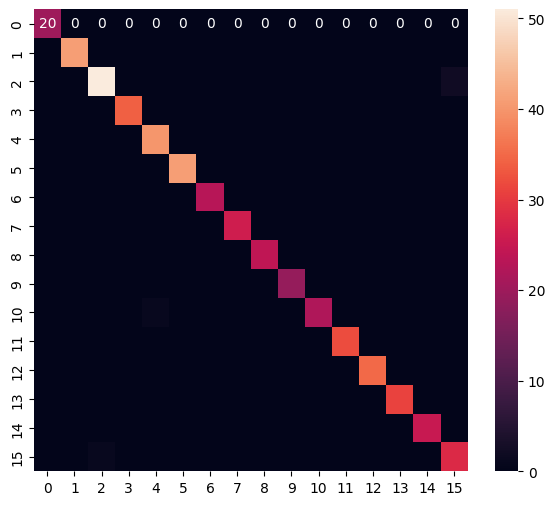

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        41
           2       0.98      0.96      0.97        53
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        40
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        19
          10       1.00      0.96      0.98        23
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        31
          14       1.00      1.00      1.00        25
          15       0.93      0.97      0.95        29

    accuracy                           0.99       496
   m

In [457]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [458]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [459]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpvosyvv9c\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpvosyvv9c\assets


19752

# Inference test

In [460]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [461]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [462]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [463]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [464]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.4322563e-07 1.7071004e-10 3.8243287e-11 4.3134807e-09 3.6144243e-08
 9.9999976e-01 1.5452614e-20 1.3686133e-20 2.5172609e-12 5.6286759e-23
 2.7642222e-12 1.6701738e-15 2.7026571e-08 1.9483354e-10 4.6941075e-08
 4.1542746e-13]
5
